In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import MinMaxScaler

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<AxesSubplot:xlabel='Id', ylabel='SalePrice'>

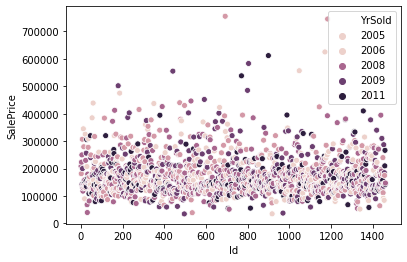

In [5]:
sns.scatterplot(x="Id", y="SalePrice", hue="YrSold", data=train)

In [6]:
features = train.loc[:, ~train.columns.isin(['Id'])]

In [7]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
pearsoncorr = features.corr(method='pearson')

In [9]:
pearsoncorr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


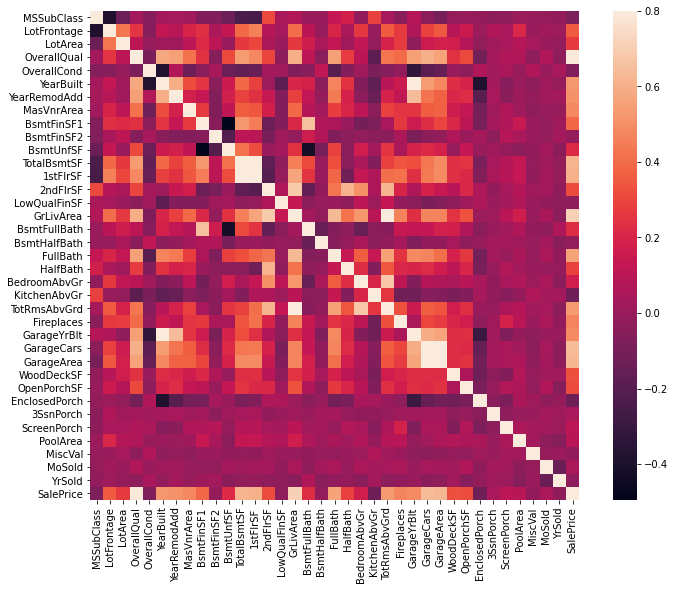

In [10]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pearsoncorr, vmax=.8, square=True);

In [11]:
train.isna().any()[lambda x: x]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [12]:
Objects = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']
Ints = ['MasVnrArea', 'GarageYrBlt']
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train[Objects] = train[Objects].fillna('None')
train[Ints] = train[Ints].fillna(0)
train['Electrical'].fillna('Mix', inplace=True)

In [13]:
train.isna().any()[lambda x: x]

Series([], dtype: bool)

Text(0.5, 1.0, '1stFlrSF')

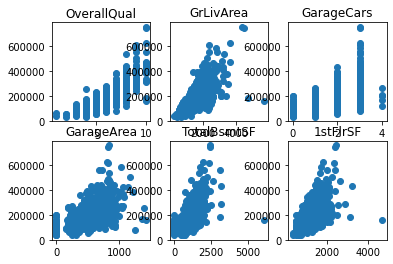

In [14]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(train['OverallQual'], train['SalePrice'])
axs[0, 0].set_title('OverallQual')
axs[0, 1].scatter(train['GrLivArea'], train['SalePrice'])
axs[0, 1].set_title('GrLivArea')
axs[0, 2].scatter(train['GarageCars'], train['SalePrice'])
axs[0, 2].set_title('GarageCars')
axs[1, 0].scatter(train['GarageArea'], train['SalePrice'])
axs[1, 0].set_title('GarageArea')
axs[1, 1].scatter(train['TotalBsmtSF'], train['SalePrice'])
axs[1, 1].set_title('TotalBsmtSF')
axs[1, 2].scatter(train['1stFlrSF'], train['SalePrice'])
axs[1, 2].set_title('1stFlrSF')

In [49]:
scaler = MinMaxScaler()

In [76]:
X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']]
y = train['SalePrice']

In [113]:
X_norm = scaler.fit_transform(X)
y_norm = (y - y.min()) / (y.max() - y.min())

X is all the above features

In [104]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

X is all above features minus the 'GarageCars'

In [100]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']], y, test_size=0.2, random_state=42)

X is all features minus sale price and id

In [17]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(train.loc[:, ~train.columns.isin(['Id', 'SalePrice'])], train['SalePrice'], test_size=0.2, random_state=42)

X is 'OverallQual' and 'GrLivArea'

In [18]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(train[['OverallQual', 'GrLivArea']], train['SalePrice'], test_size=0.2, random_state=42)

# Linear Regression

In [19]:
reg = LinearRegression()

In [105]:
cv_results_linear_1 = cvs(reg, X_norm, y_norm, cv=20)

In [106]:
print(cv_results_linear_1*100)

[82.10609714 66.96560295 79.91949788 86.32178696 86.41187125 82.69832245
 79.80784287 55.58153283 84.28429183 73.14042155 78.77240967 76.36718889
 74.2371791  78.88264254 75.37448728 77.09493193 75.24632447  1.78048331
 80.13546255 81.90585176]


In [107]:
reg.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
y_pred_lin_1 = reg.predict(X_test_1)
y_pred_norm_1 = (y_pred_lin_1 - y_pred_lin_1.min()) / (y_pred_lin_1.max() - y_pred_lin_1.min())

In [119]:
reg_r2_1 = r2_score(y_test_1, y_pred_norm_1)
print(reg_r2_1)

-1.7067089098737238


In [120]:
mse_lin_1 = mean_squared_error(y_test_1, y_pred_norm_1)
rmse_lin_1 = math.sqrt(mse_lin_1)
print(mse_lin_1, rmse_lin_1)

0.040037759353601085 0.2000943761168741


In [34]:
cv_results_linear_2 = cvs(reg, train[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']], train['SalePrice'], cv=15)

In [35]:
print(cv_results_linear_2*100)

[81.01555186 80.06600939 80.59874595 85.62094682 78.75809246 65.94395984
 79.7410119  74.91552813 79.89368066 72.30924578 78.71516122 75.07577469
 76.22953397 12.07150837 83.06126135]


In [36]:
reg.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred_lin_2 = reg.predict(X_test_2)

In [38]:
#reg.score(X_test, y_test)
reg_r2_2 = r2_score(y_test_2, y_pred_lin_2)
print(reg_r2_2)

0.7917169387810419


In [39]:
cv_results_linear_3 = cvs(reg, train[['OverallQual', 'GrLivArea']], train['SalePrice'], cv=30)

In [40]:
print(cv_results_linear_3*100)

[77.91772271 74.70624442 69.75037771 76.04721542 70.22033921 78.05950192
 77.11156413 81.47234925 74.60258765 62.46970595 51.74839686 81.6573737
 76.98049949 69.82332304 72.57224087 71.90548767 73.56864189 75.31617842
 66.07739936 72.27186008 75.79315911 72.63902574 67.09407777 70.36142325
 69.07457463 71.30559168 -0.43833028 67.59163157 75.6113027  79.5131208 ]


In [41]:
reg.fit(X_train_4, y_train_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred_lin_3 = reg.predict(X_test_4)

In [43]:
reg_r2_3 = r2_score(y_test_4, y_pred_lin_3)
print(reg_r2_3)

0.7457643057171446


y = 1.1180591938705444* + -15856.944820273184


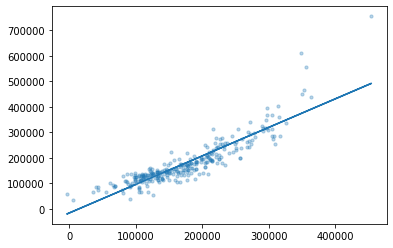

In [99]:
plt.scatter(y_pred_lin_1, y_test_1, s=10, alpha=0.3)
#plt.scatter(y_pred_lin_2, y_test_2, s=10, alpha=0.3)
#plt.scatter(y_pred_lin_3, y_test_4, s=10, alpha=0.3)
slope, intercept = np.polyfit(y_pred_lin_1, y_test_1, 1)
plt.plot(y_pred_lin_1, slope*y_pred_lin_1 + intercept)
print('y = {}* + {}'.format(slope, intercept))

# Ridge Regression

In [23]:
rcv = RidgeCV(alphas=[0.001, 0.1, 1.0, 10]).fit(X_train_2, y_train_2)

In [24]:
rcv.score(X_test_2, y_test_2)

0.7917767149981055

In [25]:
rcv.alpha_

0.001

In [26]:
ridge = Ridge(alpha=0.001)

In [27]:
ridge.fit(X_train_2, y_train_2)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
y_pred_ridge = ridge.predict(X_test_2)

In [238]:
ridge.score(X_test_2, y_test_2)

0.7917169454148693

In [239]:
rmse_ridge = math.sqrt(mse(y_test_2, y_pred_ridge))

In [240]:
print(rmse_ridge)

39969.9758831215


# Lasso Regression

In [242]:
lcv = LassoCV(alphas=[0.001, 0.1, 1.0, 10]).fit(X_train, y_train)

In [243]:
lcv.score(X_test, y_test)

0.7924553712841595

In [244]:
lcv.alpha_

0.001

In [245]:
lasso = Lasso(alpha=0.001)

In [246]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [247]:
y_pred_lasso = lasso.predict(X_test)

In [248]:
lasso.score(X_test, y_test)

0.7924553712841595

In [249]:
rmse_lasso = math.sqrt(mse(y_test, y_pred_lasso))

In [250]:
print(rmse_lasso)

39899.06019945874


# ElasticNet Regression

In [40]:
encv = ElasticNetCV(l1_ratio=[0.1, 0.5, 1.0], alphas=[0.001, 0.1, 1.0, 10]).fit(X_train, y_train)

In [41]:
encv.score(X_test, y_test)

0.7965965287235331

In [42]:
encv.alpha_

0.1

In [43]:
encv.l1_ratio_

0.5

In [44]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [45]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
y_pred_elastic = elasticnet.predict(X_test)

In [47]:
elasticnet.score(X_test, y_test)

0.7965965287235331